# Importing Libraries

In [1]:
#Importing libraries for our project
import pandas as pd
import numpy as np
from google.cloud import bigquery
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
client = bigquery.Client()
print("It's done")

It's done


# Data Collection

In [2]:
join = """
    SELECT * FROM personal-projects-351015.Cyclistic_data.tripdata_2021_08
    UNION ALL
    SELECT * FROM personal-projects-351015.Cyclistic_data.tripdata_2021_09
    UNION ALL
    SELECT * FROM personal-projects-351015.Cyclistic_data.tripdata_2021_10
    UNION ALL
    SELECT * FROM personal-projects-351015.Cyclistic_data.tripdata_2021_11
    UNION ALL
    SELECT * FROM personal-projects-351015.Cyclistic_data.tripdata_2021_12
    UNION ALL
    SELECT * FROM personal-projects-351015.Cyclistic_data.tripdata_2022_01
    UNION ALL
    SELECT * FROM personal-projects-351015.Cyclistic_data.tripdata_2022_02
    UNION ALL
    SELECT * FROM personal-projects-351015.Cyclistic_data.tripdata_2022_03
    UNION ALL
    SELECT * FROM personal-projects-351015.Cyclistic_data.tripdata_2022_04
    UNION ALL
    SELECT * FROM personal-projects-351015.Cyclistic_data.tripdata_2022_05
    UNION ALL
    SELECT * FROM personal-projects-351015.Cyclistic_data.tripdata_2022_06
    UNION ALL
    SELECT * FROM personal-projects-351015.Cyclistic_data.tripdata_2022_07
"""

In [3]:
#importing Database and converting to a dataframe
sql = """
SELECT *
FROM `personal-projects-351015.Cyclistic_data.full_annual_tripdata`
"""
data = client.query(sql).to_dataframe()

# Data Wrangling

In [4]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,ride_length
0,31D0FA86E8D73DEF,classic_bike,2022-07-10 16:57:00+00:00,2022-07-10 17:06:00+00:00,Oakley Ave & Irving Park Rd,KA1504000158,Wolcott (Ravenswood) Ave & Montrose Ave,TA1307000144,41.954341,-87.686080,41.961406,-87.676169,casual,1,9
1,1AEBAED73FCE2DD9,classic_bike,2022-07-10 11:46:00+00:00,2022-07-10 11:56:00+00:00,Wells St & Hubbard St,TA1307000151,State St & Randolph St,TA1305000029,41.889906,-87.634266,41.884621,-87.627834,member,1,10
2,635FB5B56DCD1035,classic_bike,2022-07-31 10:46:00+00:00,2022-07-31 11:00:00+00:00,Washtenaw Ave & Lawrence Ave,KA1504000080,Lincoln Ave & Belle Plaine Ave,TA1309000026,41.968987,-87.696027,41.956004,-87.680161,member,1,14
3,FBEB14B4494168B7,classic_bike,2022-07-03 14:23:00+00:00,2022-07-03 14:39:00+00:00,Central Park Ave & Elbridge Ave,15644,Central Park Ave & Elbridge Ave,15644,41.935337,-87.716889,41.935337,-87.716889,member,1,16
4,51B5EF420ED61722,classic_bike,2022-07-03 19:42:00+00:00,2022-07-03 19:54:00+00:00,DuSable Lake Shore Dr & Diversey Pkwy,TA1309000039,Halsted St & Dickens Ave,13192,41.932588,-87.636427,41.919936,-87.648830,member,1,12


In [5]:
#Checking data types to look for inconsitencies
data.dtypes

ride_id                            object
rideable_type                      object
started_at            datetime64[ns, UTC]
ended_at              datetime64[ns, UTC]
start_station_name                 object
start_station_id                   object
end_station_name                   object
end_station_id                     object
start_lat                         float64
start_lng                         float64
end_lat                           float64
end_lng                           float64
member_casual                      object
day_of_week                         int64
ride_length                         int64
dtype: object

In [6]:
#Getting the statistical values 
data.describe()

,start_lat,start_lng,end_lat,end_lng,day_of_week,ride_length
count,5.901463e+06,5.901463e+06,5.895873e+06,5.895873e+06,5.901463e+06,5.901463e+06
mean,4.190077e+01,-8.764742e+01,4.190102e+01,-8.764761e+01,4.065831e+00,1.988998e+01
std,4.725668e-02,3.093877e-02,4.734863e-02,3.056536e-02,2.051117e+00,1.479859e+02
min,4.164000e+01,-8.784000e+01,4.139000e+01,-8.897000e+01,1.000000e+00,-1.380000e+02
25%,4.188103e+01,-8.766154e+01,4.188103e+01,-8.766241e+01,2.000000e+00,6.000000e+00
50%,4.189964e+01,-8.764335e+01,4.190000e+01,-8.764375e+01,4.000000e+00,1.100000e+01
75%,4.192957e+01,-8.762872e+01,4.192968e+01,-8.762911e+01,6.000000e+00,2.000000e+01
max,4.563503e+01,-7.379648e+01,4.237000e+01,-8.750000e+01,7.000000e+00,4.162900e+04


In [7]:
#Cheking look for null values
data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    860786
start_station_id      860784
end_station_name      919896
end_station_id        919896
start_lat                  0
start_lng                  0
end_lat                 5590
end_lng                 5590
member_casual              0
day_of_week                0
ride_length                0
dtype: int64

In [8]:
#Database features 
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901463 entries, 0 to 5901462
Columns: 15 entries, ride_id to ride_length
dtypes: datetime64[ns, UTC](2), float64(4), int64(2), object(7)
memory usage: 675.4+ MB


In [9]:
#Removing null values
df = data.dropna(inplace=False)

In [10]:
#Checking if the data is ready to analyse
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
day_of_week           0
ride_length           0
dtype: int64

In [11]:
#Dropping unnecessary columns for analysis
df.drop(['start_lat', 'start_lng', 'end_lat', 'end_lng','start_station_id','end_station_id'], axis=1, inplace=True)
df.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,day_of_week,ride_length
0,31D0FA86E8D73DEF,classic_bike,2022-07-10 16:57:00+00:00,2022-07-10 17:06:00+00:00,Oakley Ave & Irving Park Rd,Wolcott (Ravenswood) Ave & Montrose Ave,casual,1,9
1,1AEBAED73FCE2DD9,classic_bike,2022-07-10 11:46:00+00:00,2022-07-10 11:56:00+00:00,Wells St & Hubbard St,State St & Randolph St,member,1,10
2,635FB5B56DCD1035,classic_bike,2022-07-31 10:46:00+00:00,2022-07-31 11:00:00+00:00,Washtenaw Ave & Lawrence Ave,Lincoln Ave & Belle Plaine Ave,member,1,14
3,FBEB14B4494168B7,classic_bike,2022-07-03 14:23:00+00:00,2022-07-03 14:39:00+00:00,Central Park Ave & Elbridge Ave,Central Park Ave & Elbridge Ave,member,1,16
4,51B5EF420ED61722,classic_bike,2022-07-03 19:42:00+00:00,2022-07-03 19:54:00+00:00,DuSable Lake Shore Dr & Diversey Pkwy,Halsted St & Dickens Ave,member,1,12


# EDA and Data Visualization

In [12]:
%%bigquery
SELECT member_casual,AVG(ride_length) AS ride_average
FROM `personal-projects-351015.Cyclistic_data.full_annual_tripdata` 
GROUP BY member_casual
ORDER BY ride_average DESC

Downloading: 100%|██████████| 2/2 [00:01<00:00,  1.43rows/s]


,member_casual,ride_average
0,casual,29.211727
1,member,12.932331


In [13]:
df.groupby(['day_of_week'])['member_casual'].value_counts(ascending=False)

day_of_week  member_casual
1            casual           380729
             member           328498
2            member           377494
             casual           229314
3            member           419981
             casual           204581
4            member           418796
             casual           210696
5            member           414455
             casual           237586
6            member           365123
             casual           263751
7            casual           422715
             member           355511
Name: member_casual, dtype: int64

In [14]:
riders = """
SELECT member_casual, COUNT(member_casual) AS TOTAL
FROM `personal-projects-351015.Cyclistic_data.full_annual_tripdata` 
GROUP BY member_casual
ORDER BY TOTAL DESC"""
total = client.query(riders).to_dataframe()
total_riders = total.set_index('member_casual')
total_riders

,TOTAL
member_casual,
member,3379237
casual,2522226


In [15]:
df['month'] = df['started_at'].dt.strftime('%m')
df.month

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0          07
1          07
2          07
3          07
4          07
           ..
5901182    05
5901229    05
5901263    07
5901264    12
5901280    05
Name: month, Length: 4629230, dtype: object

In [76]:
monthly_rides = df['month'].value_counts().reset_index()
monthly_rides

,index,month
0,08,674409
1,07,642680
2,09,621150
3,06,620350
4,05,502545
5,10,477972
6,04,272560
7,11,255904
8,03,215983
9,12,176371


In [79]:
monthly = monthly_rides.set_index('index').sort_index(ascending=True)
monthly

,month
index,
01,80128
02,89178
03,215983
04,272560
05,502545
06,620350
07,642680
08,674409
09,621150


In [23]:
average = df.groupby(['member_casual'])['ride_length'].mean().reset_index()
average

,member_casual,ride_length
0,casual,26.621724
1,member,12.600589


In [19]:
df['length'] = df['ride_length'].abs()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
ride_length = df.groupby(['day_of_week','member_casual'])['ride_length'].mean()
ride_length

day_of_week  member_casual
1            casual           30.621261
             member           14.340273
2            casual           27.663706
             member           12.216255
3            casual           23.200023
             member           11.751639
4            casual           22.807134
             member           11.888798
5            casual           23.410542
             member           12.063486
6            casual           24.661431
             member           12.254840
7            casual           29.039464
             member           14.223841
Name: ride_length, dtype: float64

# Data Visualization

Text(0, 0.5, 'Rides Average")')

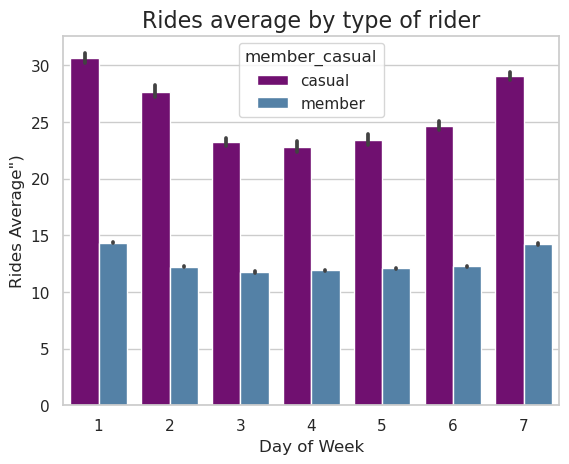

In [21]:
sns.set_theme(style="whitegrid")

sns.barplot(x='day_of_week', y='ride_length', hue='member_casual', data=df,
            palette=['purple', 'steelblue'])

#add overall title
plt.title('Rides average by type of rider', fontsize=16)

#add axis titles
plt.xlabel('Day of Week')
plt.ylabel('Rides Average")')

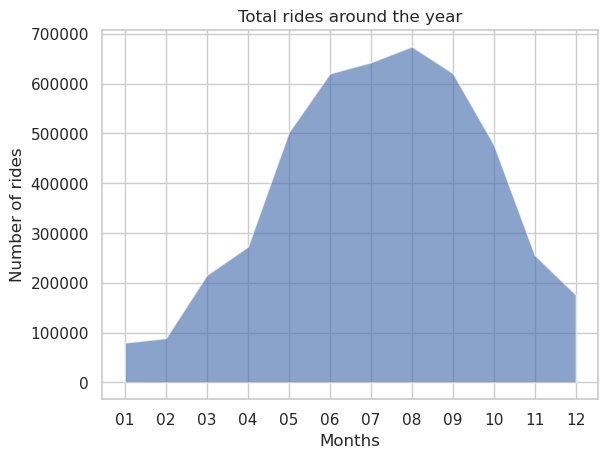

In [86]:
plt.fill_between(monthly.index, monthly.month, alpha=0.65)
plt.title('Total rides around the year')
plt.ylabel('Number of rides')
plt.xlabel('Months')
plt.show()

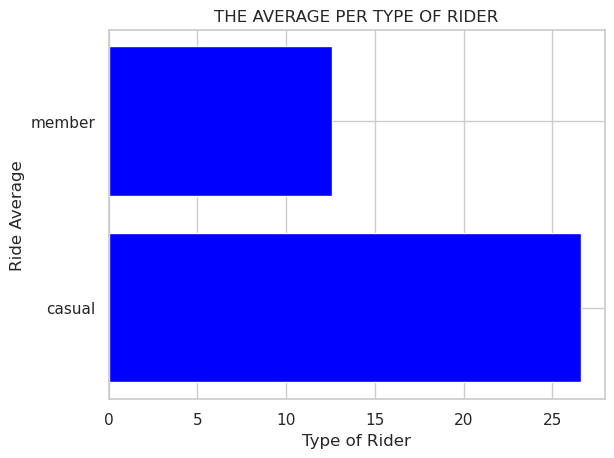

In [24]:
plt.barh(average.member_casual, average.ride_length, color='blue',alpha=1)
plt.title('THE AVERAGE PER TYPE OF RIDER')
plt.xlabel('Type of Rider')
plt.ylabel('Ride Average')
plt.show()

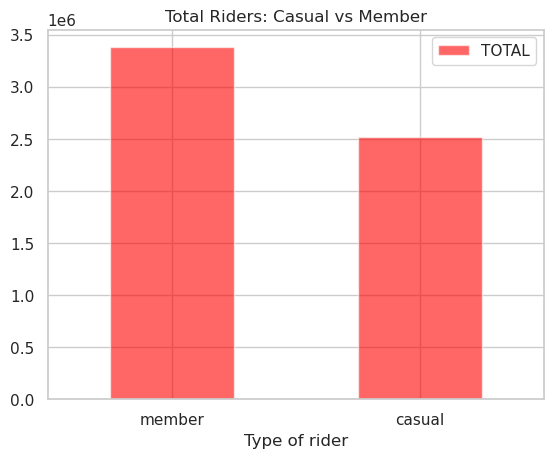

In [23]:
total_riders.plot(kind='bar',alpha=0.6, rot=0, color='red')
plt.title('Total Riders: Casual vs Member')
plt.xlabel('Type of rider')
plt.show()

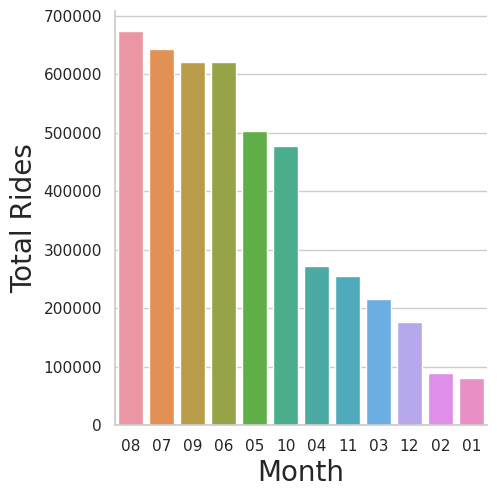

In [24]:
sns.catplot(x="index", y="month", kind="bar", data=monthly_rides)
plt.xlabel("Month",fontsize=20)
plt.ylabel("Total Rides",fontsize=20)
plt.show()